# $\delta_F$-vs-$\rho_{DM}$

In [1]:
import h5py
import numpy as np
from scipy.ndimage import gaussian_filter as gf

def get_deltaF_deltam_est(n , z=2.4, fit_deg=2):
    """Estimator for each mock"""
    mockmap = np.fromfile('./spectra/maps/map_TNG_z'+str(z)+'_n'+str(n)+'.dat')
    deltaF_mock = np.ravel(gf(mockmap.reshape(205,205,205), 4, mode='wrap'))
    DM = np.ravel(gf(h5py.File('./TNG_DensField/TNG_DM_z'+str(z)+'.hdf5','r')['DM/dens'][:], 4 , mode='wrap'))
    co = np.polyfit(deltaF_mock, DM, fit_deg)
    
    return co

def get_deltaF_deltam_est_noiseless(z=2.4, fit_deg=2):
    """Estimator for each mock"""
    truemap = h5py.File('./spectra/maps/map_TNG_true_1.0_z'+str(z)+'.hdf5','r')['map'][:]
    deltaF_true = np.ravel(gf(truemap, 4, mode='wrap'))
    DM = np.ravel(gf(h5py.File('./TNG_DensField/TNG_DM_z'+str(z)+'.hdf5','r')['DM/dens'][:], 4 , mode='wrap'))
    co = np.polyfit(deltaF_true, DM, fit_deg)
    
    return co


def get_deltaF_deltam_mean_std(nmocks=20, z=2.4, fit_deg=1):
    """Get the mean and stdev of the estimator's parameters"""
    co_all = np.empty((nmocks, int(fit_deg+1)))
    for i,n in enumerate(np.arange(1,nmocks+1)):
        co = np.array(get_deltaF_deltam_est(n, z=z, fit_deg=fit_deg))
        co_all[i,:] = co
        
    mean = np.median(co_all, axis=0)
    std = np.std(co_all, axis=0)
    for i in range(fit_deg+1):
        print(str(np.around(mean[i],2))+'+-'+ str(np.around(std[i],2)))
    return mean, std   

In [7]:
print(get_deltaF_deltam_est_noiseless(z=2.2, fit_deg=1))
print(get_deltaF_deltam_est_noiseless(z=2.3, fit_deg=1))
print(get_deltaF_deltam_est_noiseless(z=2.4, fit_deg=1))
print(get_deltaF_deltam_est_noiseless(z=2.6, fit_deg=1))

[-6.22260278  0.99999823]
[-5.50761079  0.99999839]
[-4.81646758  0.99999855]
[-4.22457015  0.9999987 ]


In [138]:
print(get_deltaF_deltam_est_noiseless(z=2.2, fit_deg=2))
print(get_deltaF_deltam_est_noiseless(z=2.3, fit_deg=2))
print(get_deltaF_deltam_est_noiseless(z=2.4, fit_deg=2))
print(get_deltaF_deltam_est_noiseless(z=2.6, fit_deg=2))

[10.7995731  -5.90745239  0.97169706]
[ 9.0058834  -5.24415264  0.97195142]
[ 7.19288349 -4.60446085  0.97301203]
[ 6.08106332 -4.05319583  0.97265636]


In [139]:
print(get_deltaF_deltam_mean_std(z=2.3, fit_deg=2))
print(get_deltaF_deltam_mean_std(z=2.4, fit_deg=2))
print(get_deltaF_deltam_mean_std(z=2.6, fit_deg=2))

14.57+-0.62
-4.97+-0.06
0.97+-0.0
(array([14.56817442, -4.96863497,  0.96664919]), array([0.61523481, 0.05739479, 0.00476237]))
11.34+-0.49
-4.59+-0.05
0.97+-0.01
(array([11.33512582, -4.58527569,  0.97371359]), array([0.48889537, 0.05352328, 0.00500886]))
10.15+-0.6
-4.37+-0.05
0.99+-0.0
(array([10.1530904 , -4.37489626,  0.99182931]), array([0.60414784, 0.05022069, 0.00364298]))


Summarizing the estimator for the redshift bins : $ \rm \left(\frac{\rho_{\rm DM}}{\langle \rho_{\rm DM} \rangle}\right)^{sm} = a_2  \ {\delta^{sm}_F}\ {}^2 \ + \ a_1 \ \delta^{sm}_F + a_0 $

|    | $a_2$ | $a_1$ | $a_2$ |
|----|---|---| --- |
| z=2.3 | 14.6 $\pm$ 0.6| -4.97$\pm$ 0.06 | 0.97 $\pm$ 0.00|
| z=2.45 | 11.4 $\pm$ 0.5| -4.59$\pm$ 0.05 | 0.97 $\pm$ 0.01|
| z=2.6 | 10.2 $\pm$ 0.6| -4.37$\pm$ 0.05 | 0.99 $\pm$ 0.00|




In [16]:
print(get_deltaF_deltam_mean_std(z=2.3, fit_deg=1))
print(get_deltaF_deltam_mean_std(z=2.4, fit_deg=1))
print(get_deltaF_deltam_mean_std(z=2.6, fit_deg=1))

-5.89+-0.06
1.0+-0.01
(array([-5.8906316 ,  1.00070614]), array([0.06173204, 0.00538543]))
-4.73+-0.05
1.0+-0.0
(array([-4.72592144,  1.00415024]), array([0.04759712, 0.00480384]))
-4.98+-0.07
1.02+-0.0
(array([-4.98348856,  1.02070596]), array([0.06818021, 0.00336597]))


Make a linear fit with the redshift :

In [8]:
def fit_redshift_evol():
    z = np.array([2.32, 2.45, 2.58]) - 2.45
    print(z)
    p = np.empty(shape=(3,3))
    sigma = np.empty(shape=(3,3))
    p[0,:], p[1,:], p[2,:] = np.array([14.57,-4.97, 0.97]), np.array([11.34,-4.59,0.98]),np.array([10.16,-4.38,0.99])
    sigma[0,:], sigma[1,:], sigma[2,:] = np.array([0.62,0.06,0.0047]),np.array([0.49,0.06,0.005]),np.array([0.61,0.05,0.0037])
    co0 = np.polyfit(z, p[:,0], 2, w=1/sigma[:,0])
    co1 = np.polyfit(z, p[:,1], 2, w=1/sigma[:,1])
    co2 = np.polyfit(z, p[:,2], 2, w=1/sigma[:,2])
    return co0, co1, co2

fit_redshift_evol()
    

[-0.13  0.    0.13]


(array([ 60.65088757, -16.96153846,  11.34      ]),
 array([-5.0295858 ,  2.26923077, -4.59      ]),
 array([-2.44462871e-14,  7.69230769e-02,  9.80000000e-01]))

The relations are then : 
$ \rm \left(\frac{\rho_{\rm DM}}{\langle \rho_{\rm DM} \rangle}\right)^{sm} = p^0  \ {\delta^{sm}_F}\ {}^2 \ + \ p^1 \ \delta^{sm}_F + p^2 $


|    | $p^0$ | $p^1$ | $p^2$ |
|----|---|---| --- |
| linear | $-23.15 \ (z-2.45) + 13.51 $ | $2.27 \ (z-2.45) - 4.98 $ | $0.12 \ (z-2.45) + 0.98$ |
| 2nd deg| $274.9 \ (z-2.45)^2 -22.12 (z-2.45) + 11.34$ | $-42 (z-2.45)^2 + 2.66 (z-2.45) + 11.34$ | $0.296 (z-2.45)^2 + 0.116 (z-2.45) + 0.97$



The relation is very redshift sensitive!!


Write the mean and std of that figure on a file :

In [2]:
def write_mean_std_hist(z=2.4, nmocks=20):
    bins=[np.linspace(-.4,.4,100), np.linspace(0,3.5,200)]
    htot1 = np.zeros((nmocks, bins[0].size-1, bins[0].size-1))
    htot2 = np.zeros((nmocks, bins[0].size-1, bins[1].size-1))
    DM = np.ravel(gaussian_filter(h5py.File('./TNG_DensField/TNG_DM_z'+str(z)+'.hdf5','r')['DM/dens'][:], 4, mode='wrap'))
    
    for i,n in enumerate(np.arange(1,nmocks+1)):
        mockmap = np.fromfile('./spectra/maps/map_TNG_z'+str(z)+'_n'+str(n)+'.dat')
        deltaF_mock = np.ravel(gaussian_filter(mockmap.reshape(205,205,205), 4, mode='wrap'))
        with h5py.File('./spectra/maps/map_TNG_true_1.0_z'+str(z)+'.hdf5','r') as ftrue :
            deltaF_true = np.ravel(gaussian_filter(ftrue['map'][:], 4, mode='wrap'))
        deltaF_true *= np.std(deltaF_mock)/np.std(deltaF_true)
        deltaF_mock = np.ravel(gaussian_filter(np.fromfile('./spectra/maps/map_TNG_z'+str(z)+'_n'+str(n)+'.dat').reshape(205,205,205), 4, mode='wrap'))
        h1,_, _ = np.histogram2d(deltaF_mock, deltaF_true, bins=[bins[0],bins[0]], density=True)
        h2, _, _= np.histogram2d(deltaF_mock, DM, bins=bins, density=True)
        
        htot1[i,:,:] = h1
        htot2[i,:,:] = h2
    with h5py.File('./DataPaper/df_mock_true_dm_z'+str(z)+'.hdf5','w') as fw:
        fw['df_mock_true/median'] = np.median(htot1, axis=0)
        fw['df_mock_true/std'] = np.std(htot1, axis=0)
        fw['df_dm/median'] = np.median(htot2, axis=0)
        fw['df_dm/std'] = np.std(htot2, axis=0)
    
def write_hist_noiseless(z=2.4):
    bins=[np.linspace(-.4,.4,100), np.linspace(0,3.5,200)]
    noiseless_map = h5py.File('./spectra/maps/map_TNG_true_1.0_z'+str(z)+'.hdf5','r')['map'][:]
    deltaF_true = np.ravel(gaussian_filter(noiseless_map, 4, mode='wrap'))
    DM = np.ravel(gaussian_filter(h5py.File('./TNG_DensField/TNG_DM_z'+str(z)+'.hdf5','r')['DM/dens'][:], 4, mode='wrap'))
    h,_, _ = np.histogram2d(deltaF_true, DM, bins=[bins[0],bins[1]], density=True)
    with h5py.File('./DataPaper/df_dm_true_z'+str(z)+'.hdf5','w') as fw:
        fw['df_dm'] = h


In [33]:
write_hist_noiseless(z=2.4)

In [5]:
import matplotlib.pyplot as plt
import h5py
from astropy.cosmology import Planck15 as cosmo
from scipy.ndimage import gaussian_filter
import mass_calcs
import matplotlib

def deltaF_true_mock(fig, ax, z=2.4, nmocks=20, vmin=0.01, vmax=10):
    matplotlib.rc('axes',edgecolor='k')
    
    # Set the axes
    plt.style.use('Notebook.mystyle')
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    
    x = np.arange(-0.4,0.4,0.01)
    bins=[np.linspace(-.4,.4,100), np.linspace(0,3.5,200)]
    extent = ([bins[0][0], bins[0][-1], bins[0][0], bins[0][-1]], [bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])
    f = h5py.File('./DataPaper/df_mock_true_dm_z'+str(z)+'.hdf5','r')
    keys = ['df_mock_true', 'df_dm']
    for i, k in enumerate(keys):
        hplot = f[k+'/median'][:]
        hplot[hplot < vmin] = vmin
        im = ax[i].imshow(np.rot90(hplot), cmap=plt.cm.viridis, norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax), extent = extent[i], aspect='auto' )
        if k=='df_dm':
            axins = inset_axes(ax[i],width="100%", height="100%",  bbox_to_anchor=(0.9,0.5, 0.02, 0.4), bbox_transform=ax[i].transAxes)
            cb_ticks_pos = 'left'
            cb = fig.colorbar(im, cax=axins, orientation='vertical', ticks=[1e-2,1e-1, 1, 10,100])
            cb.ax.yaxis.set_tick_params(color='k')
            cb.ax.yaxis.set_ticks_position(cb_ticks_pos)
            cb.ax.yaxis.set_label_position(cb_ticks_pos)
            plt.setp(plt.getp(axins, 'yticklabels'), color='w')
            cb.ax.set_ylabel('2-D PDF', labelpad=5, color='w', fontsize=20)

    
    ax[0].set_xlabel(r'$\mathrm{\delta^{\rm sm}_{\rm F, mock}}$')
    ax[0].set_ylabel(r'$\mathrm{\delta^{\rm sm}_{\rm F, noiseless}}$')
    #ax[1].set_xlabel(r'$\mathrm{\delta^{\rm sm}_{\rm F, mock}}$')
    ax[1].set_ylabel(r'$\rm  \left(\frac{\rho_{DM}}{ \langle \rho_{DM} \rangle}\right)^{\rm sm}$', fontsize=40)
    ax[1].set_xlim(-0.35,0.25)
    ax[0].set_xlim(-0.35,0.25)
    ax[0].set_ylim(-0.35,0.25)
    ax[1].set_ylim(0,3.5)
    ax[0].set_yticks(ticks = np.arange(-.3,.3,.1))
    ax[0].set_xticks(ticks = np.arange(-.3,.3,.1))
    ax[1].set_xticks(ticks = np.arange(-.3,.3,.1))
    ax[0].plot([-.3,.2],[-.3,.2], label='1:1', color='C1', ls='--')
    ax[0].legend(loc='lower right', facecolor='w')
    ax[1].legend(loc='lower left', fontsize=20, facecolor='w')
    plt.setp(ax[0].get_xticklabels(), rotation=20, fontsize=20)
    
    ax[1].grid(True)
    ax[0].grid(True)
    plt.tight_layout()


No handles with labels found to put in legend.
<ipython-input-5-50a8e1162375>:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


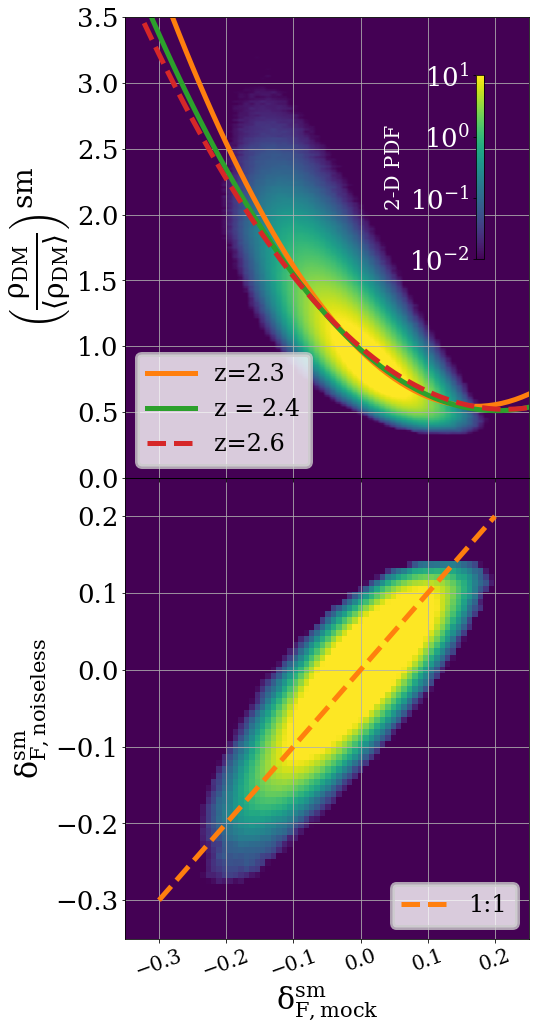

In [6]:
left, width = .2, .7
bottom2, height2 = 0.5, 0.4
bottom1, height1 = .1, .4

rect_scatter1 = [left, bottom1, width, height1]
rect_scatter2 = [left, bottom2, width, height2]

fig = plt.figure(figsize=(8, 16))
ax = []
ax.append(fig.add_axes(rect_scatter1))
ax.append(fig.add_axes(rect_scatter2))
ax[1].tick_params(axis="x", labelbottom=False)
deltaF_true_mock(fig, ax, z=2.4)
x = np.arange(-0.4,0.4,0.01)


ax[1].plot(x, np.polyval([14.56817442, -4.96863497,  0.96664919], x), label='z=2.3', color='C1')
ax[1].plot(x, np.polyval([11.33512582, -4.58527569,  0.97371359],x), label='z = 2.4', color='C2')
ax[1].plot(x, np.polyval([10.1530904 , -4.37489626,  0.99182931], x), label='z=2.6', ls='--', color='C3')
ax[1].legend(loc='lower left', facecolor='w')
#fig.savefig('deltam_deltaF_z2.4.pdf', transparent=False)

No handles with labels found to put in legend.
<ipython-input-9-366d997adfe3>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


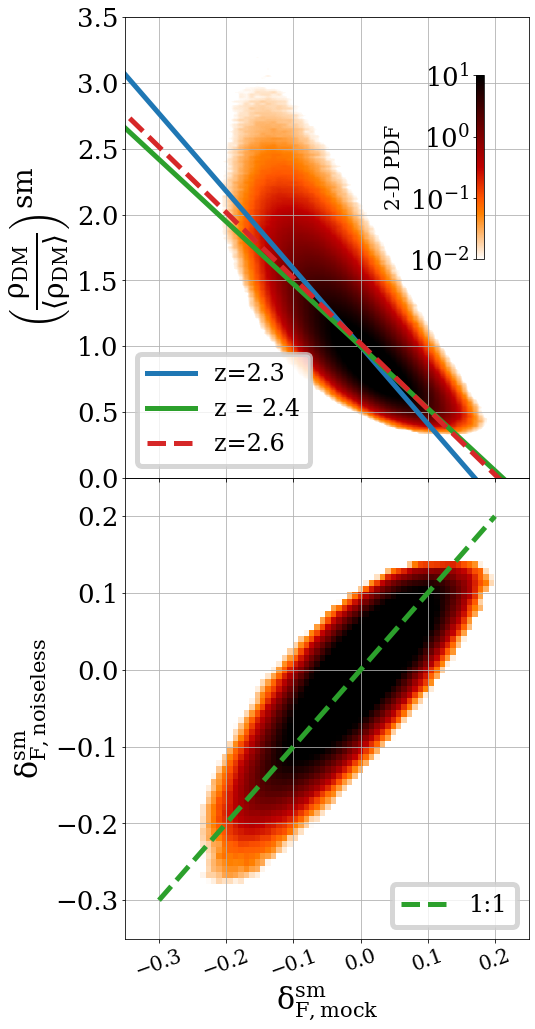

In [21]:
left, width = .2, .7
bottom2, height2 = 0.5, 0.4
bottom1, height1 = .1, .4

rect_scatter1 = [left, bottom1, width, height1]
rect_scatter2 = [left, bottom2, width, height2]

fig = plt.figure(figsize=(8, 16))
ax = []
ax.append(fig.add_axes(rect_scatter1))
ax.append(fig.add_axes(rect_scatter2))
ax[1].tick_params(axis="x", labelbottom=False)
deltaF_true_mock(fig, ax, z=2.4)
x = np.arange(-0.4,0.4,0.01)

ax[1].plot(x, np.polyval([-5.89, 1.0], x), label='z=2.3', color='C0')
ax[1].plot(x, np.polyval([-4.73, 1.0],x), label='z = 2.4', color='C2')
ax[1].plot(x, np.polyval([-4.98, 1.02], x), label='z=2.6', ls='--', color='C3')
ax[1].legend(loc='lower left')
#fig.savefig('deltam_deltaF_z2.4.pdf', transparent=False)

The estiamtores for z=2.45 and z=2.6 differ much, I have 2 speculations :

1. The lower sightline density or larger nosie at z=2.6, leads to a lower quality map reconstruction.

2. There is less cosmic evolution between z=2.6 and z=2.45 compared to z=2.3 and z=2.45.

For the first one we can check the estimator in the noiseless map. The plots below show in the noiseless maps there is only very small evolution from z=2.45 to z=2.6. 

In [27]:
def get_num_spectra():
    for z in [2.3,2.4,2.6]:
        with h5py.File('./spectra/spectra_TNG_z'+str(z)+'_n1.hdf5', 'r') as f:
            print('z = '+str(z)+' # spectra :'+str(f['spectra/axis'][:].size))
get_num_spectra()

z = 2.3 # spectra :9017
z = 2.4 # spectra :6739
z = 2.6 # spectra :4409


In [63]:
print(6739 / 9017)
print(4409 / 9017)

0.7473660862814684
0.48896528778973053


In [7]:
import matplotlib.pyplot as plt
import h5py
from astropy.cosmology import Planck15 as cosmo
from scipy.ndimage import gaussian_filter
import mass_calcs
import matplotlib

def deltaF_true_mock_noiseless(fig, ax, z=2.4):
    matplotlib.rc('axes',edgecolor='k')
    
    # Set the axes
    plt.style.use('Notebook.mystyle')
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes

    
    x = np.arange(-0.4,0.4,0.01)
    bins=[np.linspace(-.4,.4,100), np.linspace(0,3.5,200)]
    extent = ([bins[0][0], bins[0][-1], bins[0][0], bins[0][-1]], [bins[0][0], bins[0][-1], bins[1][0], bins[1][-1]])
    f = h5py.File('./DataPaper/df_dm_true_z'+str(z)+'.hdf5','r')
    hplot = f['df_dm'][:]
    im = ax.imshow(np.rot90(hplot), cmap=plt.cm.gist_heat.reversed(), norm=matplotlib.colors.LogNorm(vmin=.01, vmax=10), extent = extent[1], aspect='auto' )
    axins = inset_axes(ax,width="100%", height="100%",  bbox_to_anchor=(0.9,0.5, 0.02, 0.4), bbox_transform=ax.transAxes)
    cb_ticks_pos = 'left'
    cb = fig.colorbar(im, cax=axins, orientation='vertical', ticks=[1e-2,1e-1, 1, 10,100])
    cb.ax.yaxis.set_tick_params(color='k')
    cb.ax.yaxis.set_ticks_position(cb_ticks_pos)
    cb.ax.yaxis.set_label_position(cb_ticks_pos)
    plt.setp(plt.getp(axins, 'yticklabels'), color='k')
    cb.ax.set_ylabel('2-D PDF', labelpad=5, color='k', fontsize=20)

    
    ax.set_xlabel(r'$\mathrm{\delta^{\rm sm}_{\rm F, mock}}$')
    ax.set_ylabel(r'$\rm  \left(\frac{\rho_{DM}}{ \langle \rho_{DM} \rangle}\right)^{\rm sm}$', fontsize=40)
    ax.set_xlim(-0.35,0.25)
    ax.set_ylim(0,3.5)
    ax.set_xticks(ticks = np.arange(-.3,.3,.1))
    ax.legend(loc='lower left', fontsize=20)
    plt.setp(ax.get_xticklabels(), rotation=20, fontsize=20)
    
    ax.grid(True)
    plt.tight_layout()


No handles with labels found to put in legend.
<ipython-input-7-14ab36721d1b>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


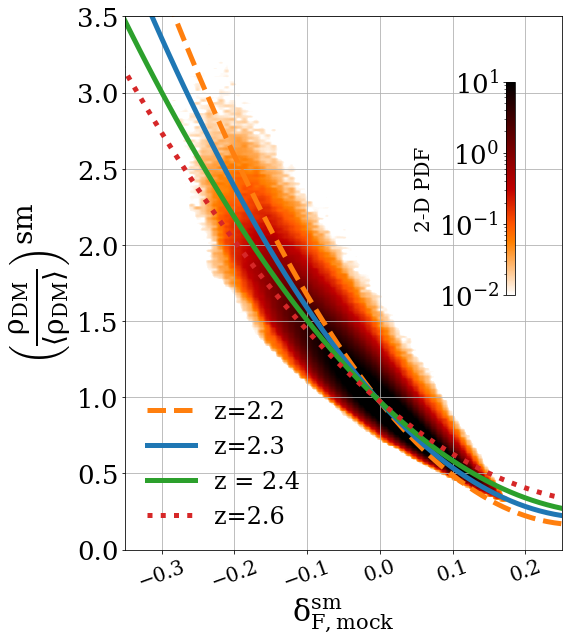

In [148]:
fig, ax = plt.subplots(1,1, figsize=(8, 9))
deltaF_true_mock_noiseless(fig, ax, z=2.4)
x = np.arange(-0.4,0.4,0.01)

co1 = [10.7995731,  -5.90745239,  0.97169706]
co2 = [9.0058834,  -5.24415264,  0.97195142]
co3 = [7.19288349, -4.60446085,  0.97301203]
co4 = [6.08106332, -4.05319583,  0.97265636]

ax.plot(x, np.polyval(co1, x), label='z=2.2', color='C1', ls='--')
ax.plot(x, np.polyval(co2, x), label='z=2.3', color='C0')
ax.plot(x, np.polyval(co3,x), label='z = 2.4', color='C2')
ax.plot(x, np.polyval(co4, x), label='z=2.6', ls='dotted', color='C3')
ax.legend(loc='lower left')
#fig.savefig('deltam_deltaF_z2.4.pdf', transparent=False)

No handles with labels found to put in legend.
<ipython-input-55-14ab36721d1b>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


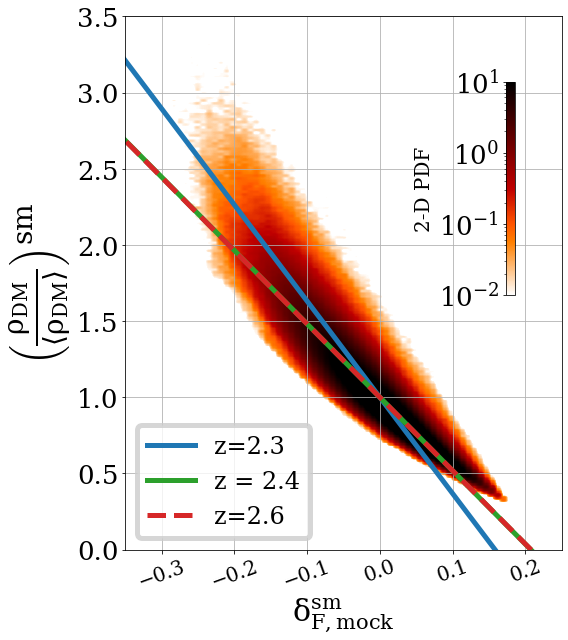

In [62]:
fig, ax = plt.subplots(1,1, figsize=(8, 9))
deltaF_true_mock_noiseless(fig, ax, z=2.4)
x = np.arange(-0.4,0.4,0.01)
co1 = [-6.31186742,  0.99999785]
co2 = [-4.81646758,  0.99999855]
co3 = [-4.81025522,  0.99999824]
ax.plot(x, np.polyval(co1, x), label='z=2.3', color='C0')
ax.plot(x, np.polyval(co2,x), label='z = 2.4', color='C2')
ax.plot(x, np.polyval(co3, x), label='z=2.6', ls='--', color='C3')
ax.legend(loc='lower left')
#fig.savefig('deltam_deltaF_z2.4.pdf', transparent=False)

In [ ]:
ls ./spectra/maps/map_TNG_true_1.0_z2.2.hdf5
ls ./TNG_DensField/TNG

# $M_{DM}$-vs-$M_{tomo}$:

### Find optimal offset in $M_{tomo}$:

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import importlib
plt.style.use('paper.mystyle')

def find_optimal_offset(ax, Mtomo, MDM, ls, label):
    offset_range = np.arange(0,1,0.0001)
    err = np.array([])
    for offset in offset_range:
        dev = MDM - (Mtomo+offset)
        err = np.append(err, np.sqrt(np.mean(dev*dev)))
    ind = np.where(err == np.min(err))
    print('Minimum error is at offset = ', offset_range[ind])
    ax.plot(offset_range, err, ls=ls, label=label)

    
    
def get_id_max_overlap(lmap_mock, lmap_true):
    """Slightly improved compared to the one used for old plots of Mtomo vs Mtomo. In this case,
    the minima in the labeled map are not numbered in order, so we can miss some numbers in between.
    returns : A dictionary of the corresponding ids of overlapping structures, just returns those structures which have
    overlapping structures in true map"""
    minima_mock = np.unique(lmap_mock)
    minima_true = np.unique(lmap_true)
    minima_mock = np.delete(minima_mock, np.where(minima_mock==0))
    minima_true = np.delete(minima_true, np.where(minima_true==0))
    
    
    id_max_overlap = {'mock':np.array([]),'true':np.array([])}
    for i in minima_mock:
        indm = np.where(lmap_mock==i)
        idtrue, counts = np.unique(lmap_true[indm], return_counts=True)
        if idtrue[0] == 0:
            idtrue = np.delete(idtrue, 0)
            counts = np.delete(counts, 0)
            if counts.size== 0 :
                continue
        counts_sorted = np.sort(counts)
        # Here, If 2 sub-contours overlap identically, we pick just the one with lower id
        indt = np.where(counts == counts_sorted[-1])[0][0]
        if idtrue[indt]!=0 :
            id_max_overlap['mock'] = np.append(id_max_overlap['mock'], i)
            id_max_overlap['true'] = np.append(id_max_overlap['true'], idtrue[indt])
    id_max_overlap['true'].astype(int); id_max_overlap['mock'].astype(int)
    return id_max_overlap

def get_MDM(n=1, z=2.4, th=2.35, lc=2.0, conversion_not_adjusted=False):
    
    import LATIS
    import importlib
    from LATIS.codes import minima
    importlib.reload(minima)
    if conversion_not_adjusted:
        with h5py.File('./thresh/n'+str(n)+'/labeled_map_TNG_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'_conversion_not_adjusted.hdf5','r') as f:
            lmap_mock = f['map'][:]
        peaks_mock = h5py.File('./thresh/n'+str(n)+'/peaks_TNG_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'_conversion_not_adjusted.hdf5', 'r')
    else:
        with h5py.File('./thresh/n'+str(n)+'/labeled_map_TNG_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5','r') as f:
            lmap_mock = f['map'][:]
        peaks_mock = h5py.File('./thresh/n'+str(n)+'/peaks_TNG_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5', 'r')
    with h5py.File('./thresh/n'+str(n)+'/labeled_map_TNG_true_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5','r') as f :
        lmap_true = f['map'][:]
    peaks_true = h5py.File('./thresh/n'+str(n)+'/peaks_TNG_true_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5','r')

    DM = h5py.File('./TNG_DensField/TNG_DM_z'+str(z)+'.hdf5','r')['DM/dens'][:]
    z_accurate = h5py.File('./spectra/spectra_TNG_z'+str(z)+'_n1.hdf5','r')['Header'].attrs['redshift']
    
    DM *= minima.convert_Delta_Msol_ph(z=z_accurate)
    MDM_true = np.array([])
    MDM_mock = np.array([])
    MDM_mock_true = np.array([])
    for i in range(1, peaks_mock['mtomo'].size+1):
        ind = np.where(lmap_mock == i)
        MDM_mock = np.append(MDM_mock, np.log10(np.sum(DM[ind])))
    for i in range(1, peaks_true['mtomo'].size+1):
        ind = np.where(lmap_true == i)
        MDM_true = np.append(MDM_true, np.log10(np.sum(DM[ind])))
    
    id_max_overlap = get_id_max_overlap(lmap_mock=lmap_mock, lmap_true=lmap_true)
    for i in id_max_overlap['true'][:]:
        ind = np.where(lmap_true==i)
        MDM_mock_true = np.append(MDM_mock_true, np.log10(np.sum(DM[ind])))
    return peaks_mock['mtomo'][:], peaks_true['mtomo'][:], MDM_mock, MDM_true, MDM_mock_true, id_max_overlap


In [2]:
def write_data(z=2.4, th=2.35, lc=2.00, offset=0.114, conversion_not_adjusted=False):
    if conversion_not_adjusted:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'_conversion_not_adjusted.hdf5'
    else:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'.hdf5'
    with h5py.File(fname,'w') as fw:
        for n in range(1,21):
            Mtomo_mock, Mtomo_true, MDM_mock, MDM_true, MDM_mock_true, id_max_overlap = get_MDM(n=n, z=z, th=th, lc=lc)
            fw[str(n)+'/Mtomo_mock'] = Mtomo_mock[:]+offset
            fw[str(n)+'/MDM_mock'] = MDM_mock[:]
            fw[str(n)+'/Mtomo_mock_overlap'] = Mtomo_mock[:][id_max_overlap['mock'][:].astype(int)-1]+offset
            fw[str(n)+'/MDM_true_overlap'] = MDM_mock_true
            fw[str(n)+'/id_max_overlap/mock'] = id_max_overlap['mock'][:]
            fw[str(n)+'/id_max_overlap/true'] = id_max_overlap['true'][:]

In [3]:
def make_a_pool(nrange, z=2.4, th=2.35, lc=2.00, conversion_not_adjusted=False):
    """Make a pool of all strucutres in all mocks"""
    Mtomo = np.array([])
    MDM = np.array([])
    if conversion_not_adjusted:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'_conversion_not_adjusted.hdf5'
    else:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'.hdf5'
    f = h5py.File(fname,'r')
    for n in nrange:
        Mtomo = np.append(Mtomo, f[str(int(np.around(n)))+'/Mtomo_mock_overlap'][:])
        MDM = np.append(MDM, f[str(int(np.around(n)))+'/MDM_true_overlap'][:])

    # Randomize the pool
    ind_rnd = np.random.choice(np.arange(Mtomo.size), size= Mtomo.size, replace=False)
    Mtomo = Mtomo[ind_rnd]
    MDM = MDM[ind_rnd]

    return Mtomo, MDM


def plot_different_fits(train_size=16, z=2.4, th=2.35, lc=2.00, conversion_not_adjusted=False):
    
    import scipy.stats
    from scipy.stats import linregress
    
    fig, ax = plt.subplots(figsize=(5,5))
    x = np.arange(13,16.5, 1)
    if conversion_not_adjusted:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'_conversion_not_adjusted.hdf5'
    else:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'.hdf5'
    f = h5py.File(fname,'r')

    slopes = []
    intercepts = []
    ntrain = np.random.choice(np.arange(1,21), size= train_size, replace=False)
    y = np.zeros((train_size, x.size))
    for i, n in enumerate(ntrain):
        Mtomo_mock = f[str(n)+'/Mtomo_mock_overlap'][:]
        co = linregress(Mtomo_mock[:] - 14, f[str(n)+'/MDM_true_overlap'][:])
        slopes.append(co[0])
        intercepts.append(co[1])
        ax.plot(x, co[0]*(x-14)+co[1], alpha=0.7, lw=1)
        y[i] = co[0]*(x-14)+co[1]
    mean = np.mean(y, axis=0)
    #ax.plot(x, mean, lw=4)
    std = np.std(y, axis=0)
    
    slope_mean = np.mean(slopes)
    intercept_mean = np.mean(intercepts)
    print('Slope : ', str(slope_mean)[:5]+'+-'+str(np.std(slopes))[:5])
    print('Intercept : ', str(intercept_mean)[:5]+'+-'+str(np.std(intercepts))[:5])
    ax.fill_between(x=x, y1=mean-std, y2=mean+std, color='C3', alpha=0.4, edgecolor='None')
    
    
    ax.set_xlim((13,16))
    ax.set_ylim((13,16))
    ax.set_xlabel(r'$\mathrm{M_{tomo, mock}}$')
    ax.set_ylabel(r'$\mathrm{M_{DM, noiseless}}$')
    
    return ntrain, (intercept_mean, slope_mean)

def test_fit(co, ntest, z=2.4, th=2.35, lc=2.00, bins=np.array([13, 14, 14.5, 15.5]), conversion_not_adjusted=False):
    """Find the errors for in mass bins of bins for the mock maps array of ntest"""
    
    fit = lambda x : co[1]*(x-14) +co[0]
    Mtomo, MDM = make_a_pool(ntest,z=z, th=th, lc=lc, conversion_not_adjusted=conversion_not_adjusted)
    
    err = []
    for i in range(bins.size-1):
        ind = np.where( (Mtomo > bins[i])*(Mtomo < bins[i+1]))
        dev = fit(Mtomo[ind]) - MDM[ind]
        err.append(np.sqrt(np.sum(dev*dev)/dev.size))
    
    return err

In [4]:
def get_kde(M1, M2, mmin= 13, mmax= 16):

    from scipy.stats import gaussian_kde as gkde
    
    data = np.zeros((2,M1.size))
    data[0,:] = M1
    data[1,:] = M2

    kernel = gkde(data)  
    X, Y = np.mgrid[mmin:mmax:50j, mmin:mmax:50j]
    grid_points = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(kernel(grid_points).T, X.shape)
    del X, Y
    
    return Z

def get_mean_KDE(z, th, lc, nmocks=20, first_plot=True):
    f = h5py.File('./DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'.hdf5','r')
    Zall = []
    if first_plot:
        for n in np.arange(1,nmocks+1):
            Zall.append(get_kde(f[str(n)+'/Mtomo_mock'][:], f[str(n)+'/MDM_mock'][:]))
    else:
        for n in np.arange(1,nmocks+1):
            Zall.append(get_kde(f[str(n)+'/Mtomo_mock_overlap'][:], f[str(n)+'/MDM_true_overlap'][:]))
    f.close()
    
    Zmean = np.zeros(shape=(50,50))
    for Z in Zall:
        Zmean += Z
    Zmean /= nmocks
    
    return Zmean
        

In [5]:
def plot_Mtomo_MDM(fig, ax, Mtomo, MDM, z, th, lc, signif=None, linear_transform=False, title='', xlabel=r'$\rm log[M_{tomo}]$',  ylabel=r'$\rm log[M_{DM, noiseless}]$',
                   data_for_Drew=None, co=None, legend=True, plot_kde=False, first_plot=True, vmin=0.01, vmax=1):
    
    import scipy.stats
    from scipy.stats import linregress
    
    mmin, mmax = 13, 16
    
    if plot_kde :
        
        Z = get_mean_KDE(z=z, th=th, lc=lc, first_plot=first_plot)
        #Z[Z < 0.01*vmin] = 0.01*vmin
        im = ax.imshow(np.rot90(Z), cmap=plt.cm.viridis,extent = [mmin, mmax, mmin, mmax] )
        cb = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.25, shrink=0.7)
        
        cb.ax.set_xlabel('Gaussian KDE')
    
    if co is None:
        co = linregress(Mtomo-14, MDM)
        #print('fitting line :', co)
    if linear_transform:
        Mtomo *= co[0]
        Mtomo += co[1]
    else :
        x = np.array([13-14,16])
        ax.plot(x, co[0]*(x-14)+co[1], alpha=0.7, label='power-law estimator',ls='dotted', lw=8)
    
    ax.plot([13,16],[13,16], alpha=0.4, color='k', label='1:1', ls='--', lw=8)

    if signif is None :
        ax.scatter(Mtomo, MDM, alpha=0.3)
    else :
        ind1 = (signif > -2.5)*(signif < -2.35)
        ind2 = (signif > -3.0)*(signif < -2.5)
        ind3 = (signif > -3.5)*(signif < -3.0)
        ind4 = (signif < -3.5)
        ax.scatter( Mtomo[ind1], MDM[ind1], alpha=0.6, label=r'$-2.5 < \sigma < -2.35$', s=50, facecolor='None', edgecolor='r', marker='^', lw=2)
        ax.scatter( Mtomo[ind2], MDM[ind2], alpha=0.65, label=r'$-3.0 < \sigma < -2.5$', s=50, facecolor='None', edgecolor='C1', marker='s', lw=2)
        ax.scatter( Mtomo[ind3], MDM[ind3], alpha=0.6, label=r'$-3.5 < \sigma < -3.0$', s=50, facecolor='None', edgecolor='b', marker='o', lw=2)
        ax.scatter( Mtomo[ind4], MDM[ind4], alpha=0.6, label=r'$ \sigma < -3.5 $', s=50, facecolor='None', edgecolor='w', marker='D', lw=2)
        if data_for_Drew is not None:
            fw = h5py.File(data_for_Drew, 'w')
            fw['Mtomo'] = Mtomo
            fw['MDM'] = MDM
            fw['signif'] = signif
    
    bins = [13,14,14.5,15.5]
    std = []
    co = [co[0], co[1]]
    for b in range(1,len(bins)):
        ind = np.where((Mtomo[:] > bins[b-1])*(Mtomo[:] < bins[b]))
        #print('diff = ', MDM[ind] - Mtomo[ind])
        dev = MDM[ind] - np.polyval(co, Mtomo[ind])
        #print('dev = ', dev)
        std.append(np.sqrt(np.mean(dev*dev)))
    #print('RMS scatter around the fit in bins of ', bins, ' are :', std)
    dev = MDM - np.polyval(co, Mtomo)
    #print(' The total RMS scatter around the fit is : ', np.sqrt(np.mean(dev*dev)))
        
    ax.set_xlim((13,16))
    ax.set_ylim((13,16))
    ax.set_xticks(np.arange(13.5,16,.5))
    ax.set_yticks(np.arange(13.5,16,.5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.7)
    ax.set_title(title)
    if legend:
        ax.legend( framealpha=0.7, loc=(1.05, 0.2), fontsize=18, facecolor='gray', frameon=True)        
    plt.setp(ax.get_xticklabels(), rotation=40)

In [6]:
def plot_for_paper(n, z, th, lc, co=(0.40,14.50), vmin=0.01, vmax=1e2, conversion_not_adjusted=False):
    """Helper function"""
    if conversion_not_adjusted:
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'_conversion_not_adjusted.hdf5'
    else :
        fname = './DataPaper/Mtomo_MDM_z'+str(z)+'_th'+str(th).ljust(4,'0')+'_lc'+str(lc).ljust(4,'0')+'.hdf5'
    f = h5py.File(fname,'r')
    fig, ax = plt.subplots(1,2, figsize=(18,9))

    signif = h5py.File('./thresh/n'+str(n)+'/peaks_TNG_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5', 'r')['signif'][:]
    plot_Mtomo_MDM(fig, ax[0], f[str(n)+'/Mtomo_mock'][:], f[str(n)+'/MDM_mock'][:], z=z, th= th, lc=lc, signif=signif,
    xlabel=r'$\rm log [ M_{tomo} ]$', ylabel=r'$\rm log [ M_{DM, mock}]$', legend=False, plot_kde=True, 
    first_plot=True, vmin=vmin, vmax=vmax)

    signif = h5py.File('./thresh/n'+str(n)+'/peaks_TNG_z'+str(z)+'_n'+str(n)+'_sigma4_th'+str(np.around(th,2)).ljust(4,'0')+'_lc'+str(np.around(lc,2)).ljust(4,'0')+'.hdf5', 'r')['signif'][:]
    signif = signif[f[str(n)+'/id_max_overlap/mock'][:].astype(int)-1]

    plot_Mtomo_MDM(fig, ax[1], f[str(n)+'/Mtomo_mock_overlap'][:], f[str(n)+'/MDM_true_overlap'][:], z=z, th=th, lc=lc, 
                   signif=signif, co=co, legend=True, plot_kde=True, first_plot=False)
    
    
    f.close()
    plt.tight_layout(pad=0)
    return fig

## $z=2.3, 2.4, 2.6$ and $\nu = -2.0$, $\kappa = -2.35$ :

In [7]:
def get_offset(conversion_not_adjusted=True):
    z, ls= [2.3,2.4, 2.6], ['--', 'solid', 'dotted']
    fig, ax = plt.subplots()
    ax.set_xlabel('offset (dex)')
    ax.set_ylabel(r'$rms \ M_{tomo, raw} - M_{DM, mock}$')
    for i in range(3):
        if i==1:
            Mtomo_mock, _, MDM_mock, _, _, _ = get_MDM(n=1, z=z[i], th=2.35, lc=2.00)
        else:
            Mtomo_mock, _, MDM_mock, _, _, _ = get_MDM(n=1, z=z[i], th=2.35, lc=2.00, conversion_not_adjusted=conversion_not_adjusted)
        find_optimal_offset(ax, Mtomo_mock, MDM_mock, ls=ls[i], label='z='+str(z[i]))
    ax.legend()

Minimum error is at offset =  [0.1318]
Minimum error is at offset =  [0.1142]
Minimum error is at offset =  [0.1043]
Minimum error is at offset =  [0.1112]
Minimum error is at offset =  [0.1142]


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


Minimum error is at offset =  [0.1105]


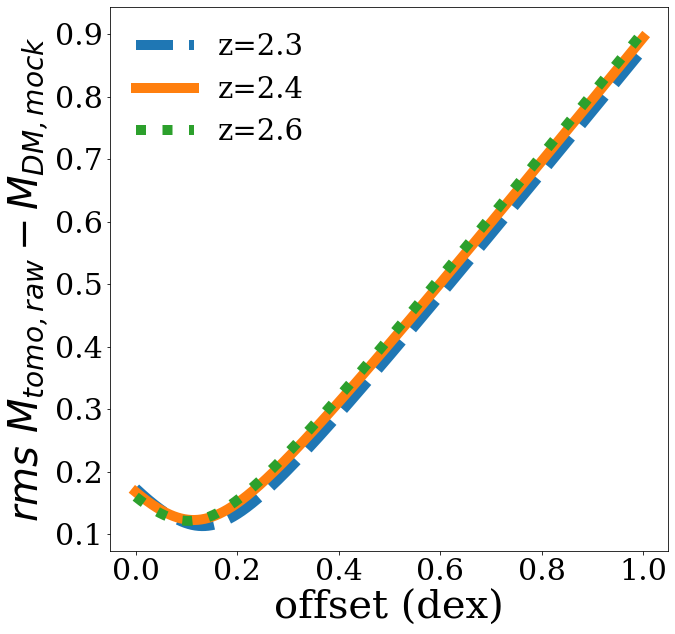

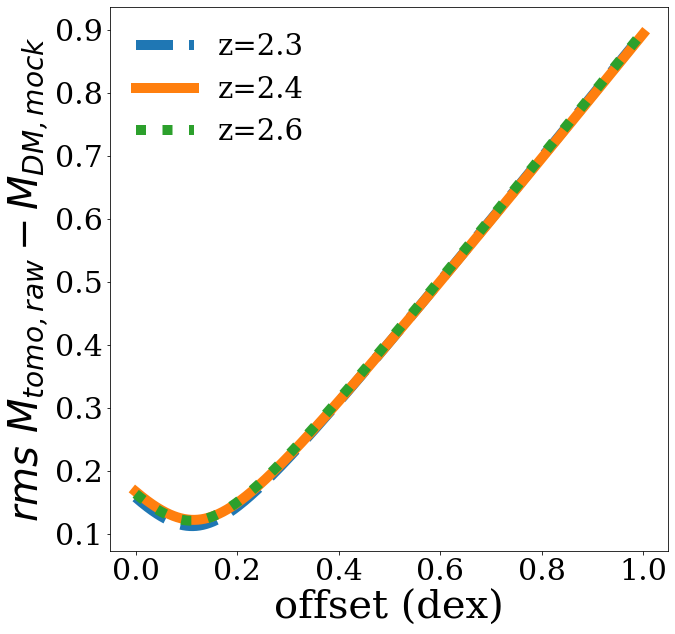

In [7]:
get_offset(True)
get_offset(False)

In [43]:
write_data(z=2.3, th=2.35, lc=2.00, offset=0.114,conversion_not_adjusted=False)
write_data(z=2.3, th=2.35, lc=2.00, offset=0.114,conversion_not_adjusted=True)
write_data(z=2.6, th=2.35, lc=2.00, offset=0.114,conversion_not_adjusted=False)
write_data(z=2.6, th=2.35, lc=2.00, offset=0.114,conversion_not_adjusted=True)

In [42]:
write_data(z=2.4, th=2.35, lc=2.00, offset=0.114)

In [9]:
def test():
    print(h5py.File('./DataPaper/Mtomo_MDM_z2.4_th2.35_lc2.00.hdf5','r')['1'].keys())
test()

<KeysViewHDF5 ['MDM_mock', 'MDM_true_overlap', 'Mtomo_mock', 'Mtomo_mock_overlap', 'id_max_overlap']>


### z=2.3 :

Mean fit :

Slope :  0.421+-0.088
Intercept :  14.55+-0.056
[0.4267818294484017, 0.38932343843118966, 0.3097718744504274]
Slope :  0.434+-0.081
Intercept :  14.54+-0.057
[0.394055999887587, 0.35873507656142195, 0.33467390379648865]


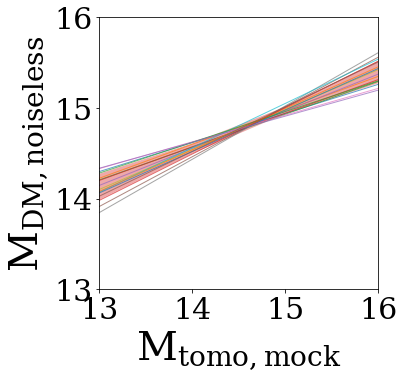

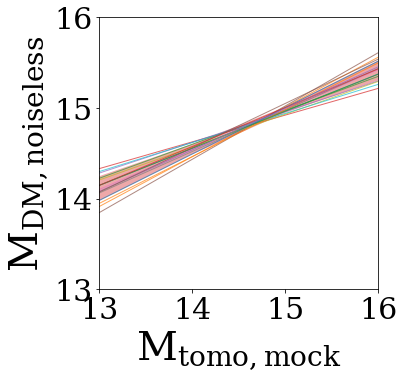

In [86]:
for conversion_not_adjusted in [False, True]:
    ntrain, co = plot_different_fits(z=2.3, th=2.35, lc=2.00, conversion_not_adjusted=conversion_not_adjusted)
    ntest = np.arange(1,21)[np.in1d(np.arange(1,21), ntrain, invert=True)]
    print(test_fit(co, ntest,z=2.3, th=2.35, lc=2.00, conversion_not_adjusted=conversion_not_adjusted))

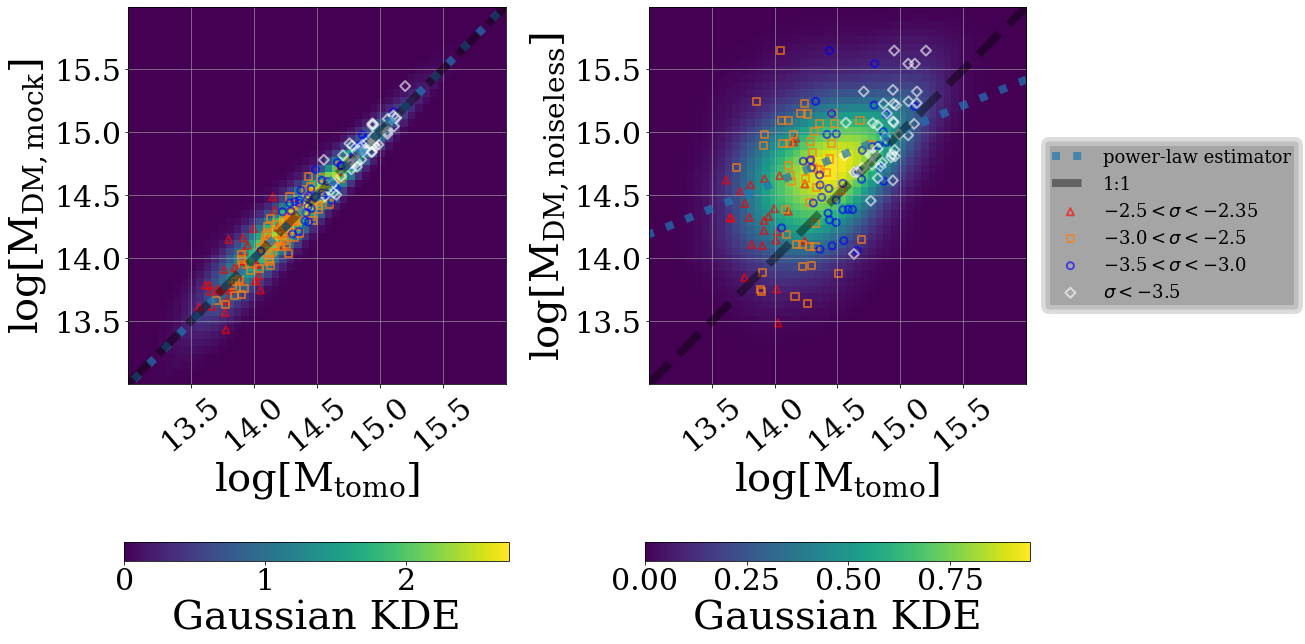

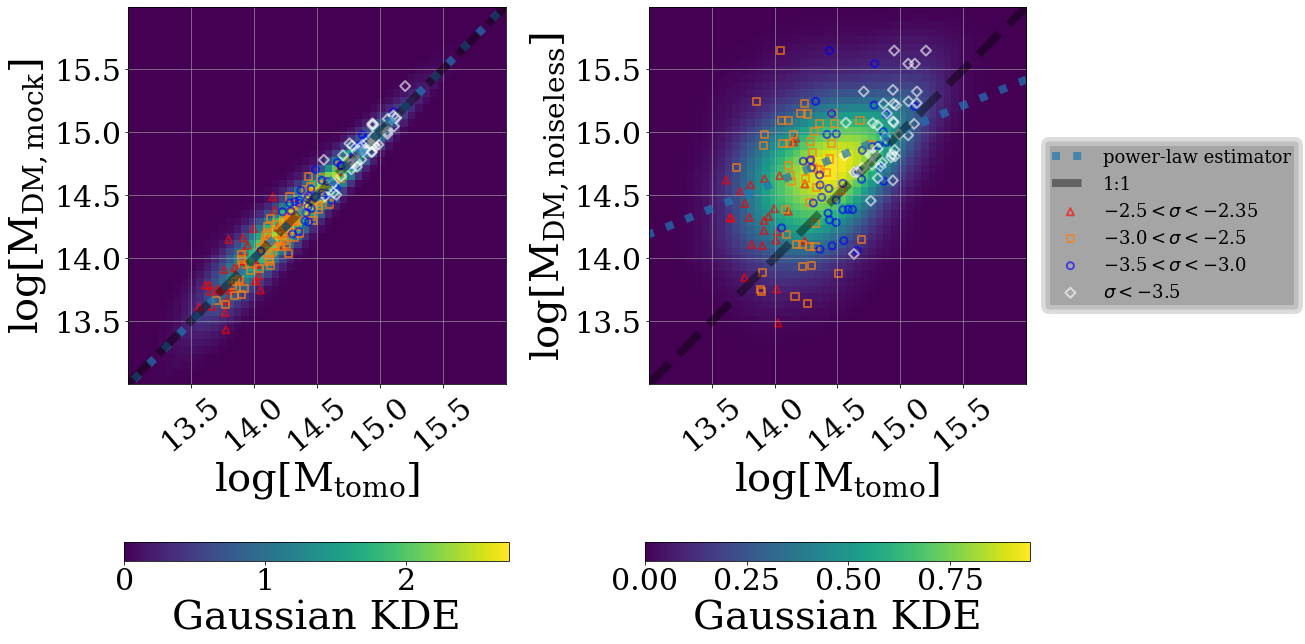

In [17]:
fig = plot_for_paper(n=1, z=2.3, th=2.35, lc=2.00, co=(0.41,14.60), vmin=0.2, vmax=1, conversion_not_adjusted=False)
fig = plot_for_paper(n=1, z=2.3, th=2.35, lc=2.00, co=(0.41,14.60), vmin=0.2, vmax=1, conversion_not_adjusted=True)

### z = 2.4

Slope :  0.382+-0.064
Intercept :  14.54+-0.040


[0.36553288158104547, 0.3508318325226877, 0.28318731874330133]

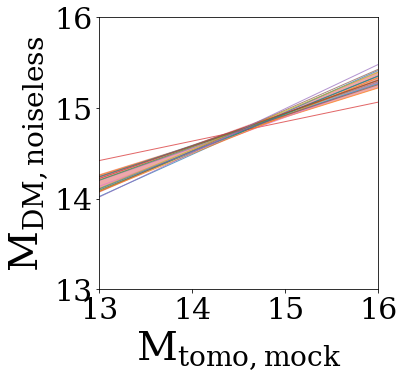

In [78]:
ntrain, co = plot_different_fits(z=2.4, th=2.35, lc=2.00)
ntest = np.arange(1,21)[np.in1d(np.arange(1,21), ntrain, invert=True)]
test_fit(co, ntest,z=2.4, th=2.35, lc=2.00)

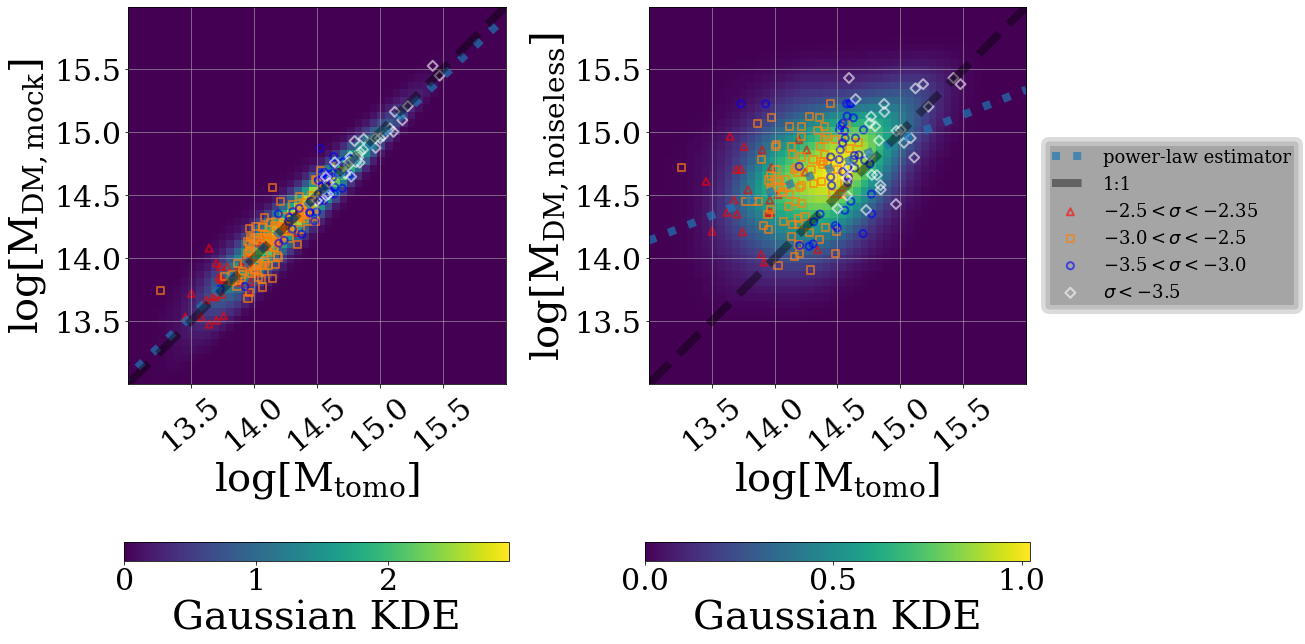

In [40]:
fig = plot_for_paper(n=1, z=2.4, th=2.35, lc=2.00, co=(0.40,14.54), vmin=0.2, vmax=1)
fig.savefig('./Mtomo_mock_MDM_true_kde.pdf')

### z=2.6:
Mean estimator :

Slope :  0.344+-0.051
Intercept :  14.58+-0.029
[0.3140003947136279, 0.33319637802117874, 0.33322315346464293]
Slope :  0.351+-0.045
Intercept :  14.57+-0.030
[0.397262458060255, 0.3433490315625353, 0.30439944512201766]


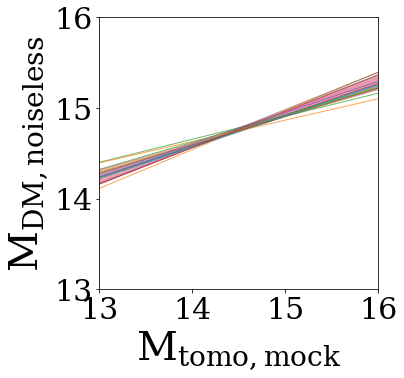

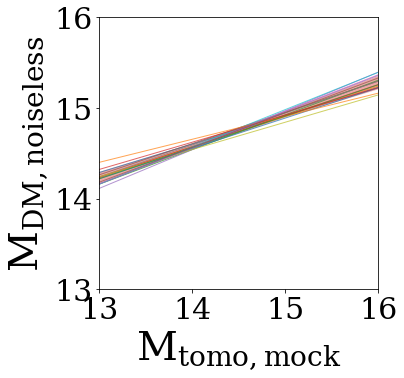

In [96]:
for conversion_not_adjusted in [False, True]:
    ntrain, co = plot_different_fits(z=2.6, th=2.35, lc=2.00, conversion_not_adjusted=conversion_not_adjusted)
    ntest = np.arange(1,21)[np.in1d(np.arange(1,21), ntrain, invert=True)]
    print(test_fit(co, ntest,z=2.6, th=2.35, lc=2.00, conversion_not_adjusted=conversion_not_adjusted))

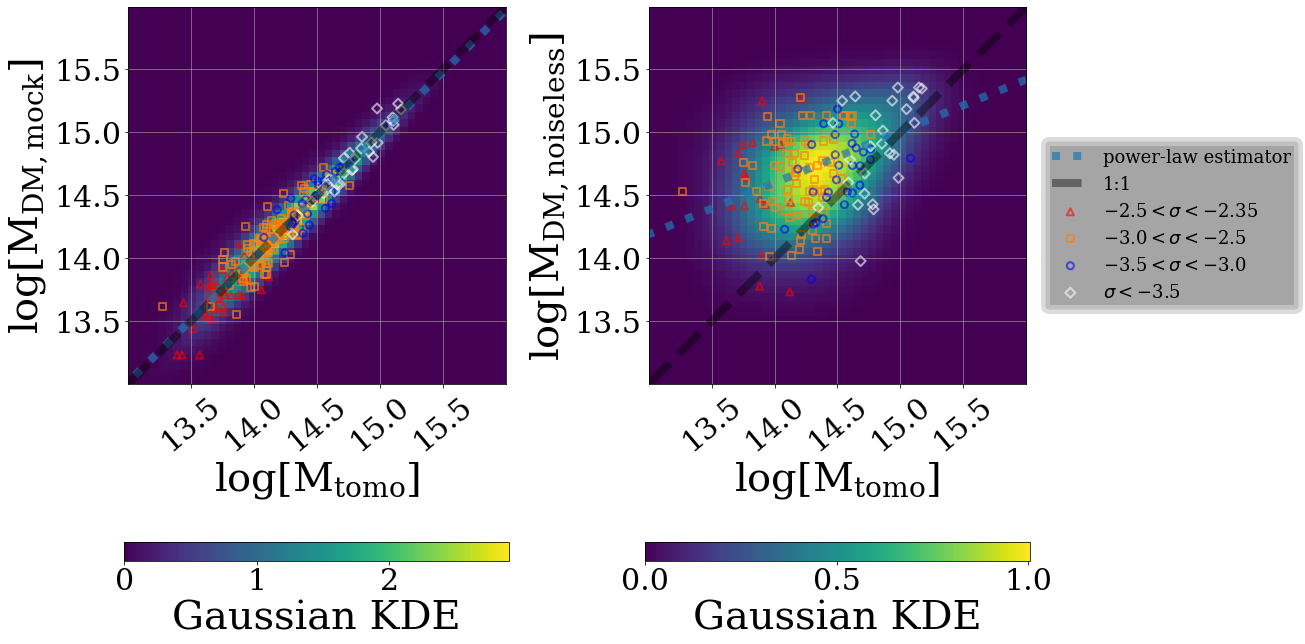

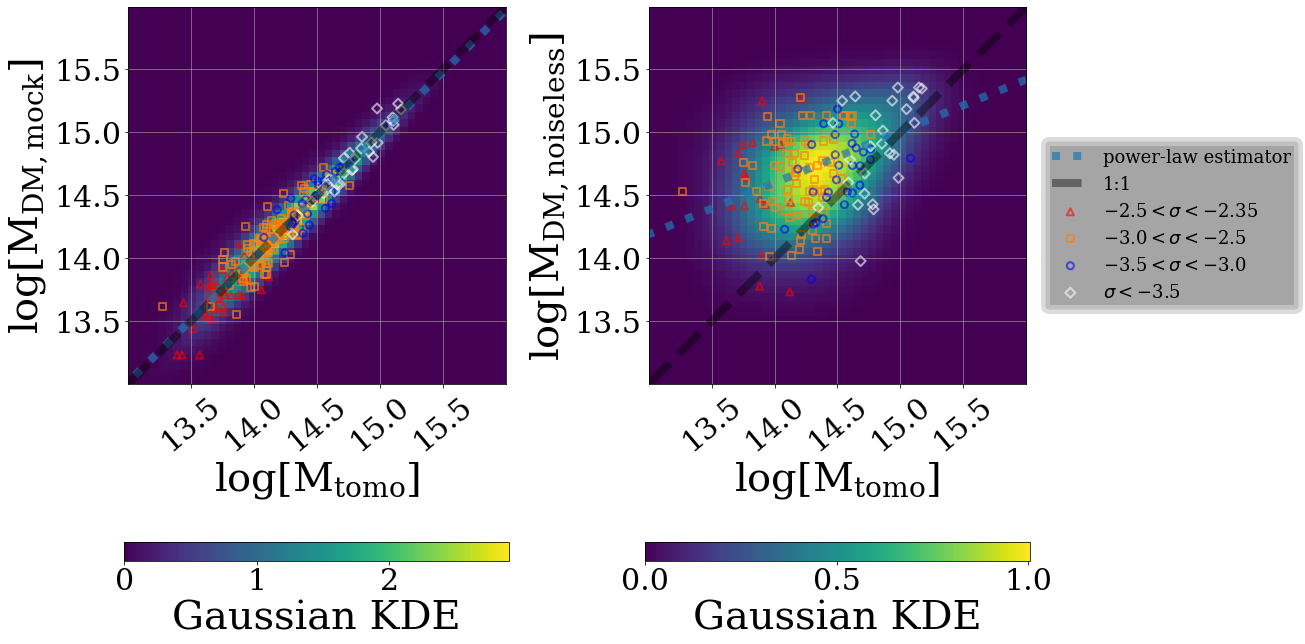

In [32]:
fig = plot_for_paper(n=1, z=2.6, th=2.35, lc=2.00, co=(0.41,14.60), vmin=0.2, vmax=1, conversion_not_adjusted=False)
fig = plot_for_paper(n=1, z=2.6, th=2.35, lc=2.00, co=(0.41,14.60), vmin=0.2, vmax=1, conversion_not_adjusted=True)

|z | # Watersheds | slope | intercept |
|--|--|--| --|
|2.3|  | 0.43+-0.09 | 14.54+-0.06|
|2.4|  | 0.39+-0.07 | 14.54+-0.04|
|2.6|  | 0.35+-0.05 | 14.58+-0.03|

- So, using same watershed parameters, we would only need a different offset.
- But, in real observatio

## optimized $\kappa$ and $\nu$ for each z=2.3 and 2.6 :

In [90]:
def get_offset():
    z, ls= [2.3,2.4,2.6], ['--','solid','dotted']
    lc, th = [2.35, 2.0, 1.90], [2.75, 2.35, 2.4]
    fig, ax = plt.subplots()
    ax.set_xlabel('offset (dex)')
    ax.set_ylabel(r'$rms \ M_{tomo, raw} - M_{DM, mock}$')
    for i in range(3):
        Mtomo_mock, _, MDM_mock, _, _, _ = get_MDM(n=1, z=z[i], th=th[i], lc=lc[i])
        find_optimal_offset(ax, Mtomo_mock, MDM_mock, ls=ls[i], label='z='+str(z[i]))
    ax.legend()

Minimum error is at offset =  [0.2486]
Minimum error is at offset =  [0.2133]
Minimum error is at offset =  [0.2189]


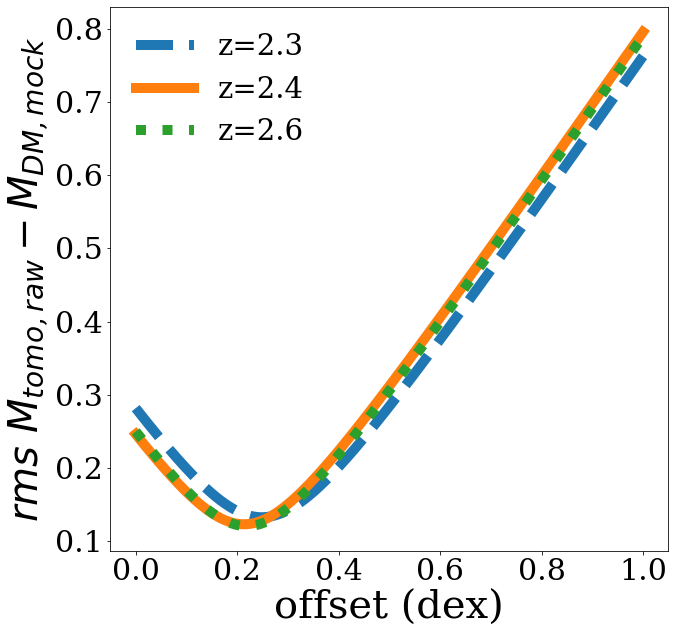

In [91]:
get_offset()

In [39]:
#write_data(z=2.3, th=2.75, lc=2.35, offset=0.249)

Slope :  0.411+-0.092
Intercept :  14.59+-0.052


[0.2952599925486169, 0.3470076475311647, 0.28581739075440804]

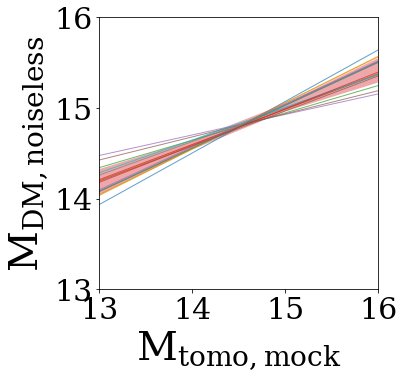

In [89]:
ntrain, co = plot_different_fits(z=2.3, th=2.75, lc=2.35)
ntest = np.arange(1,21)[np.in1d(np.arange(1,21), ntrain, invert=True)]
test_fit(co, ntest,z=2.3, th=2.75, lc=2.35)

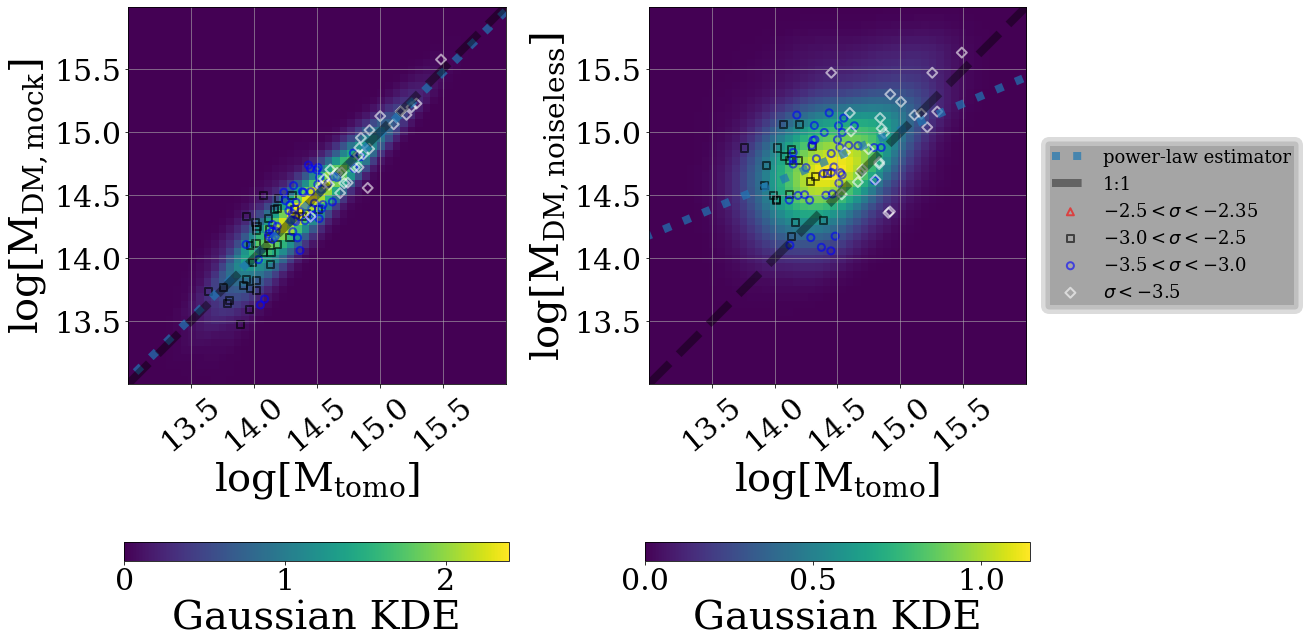

In [72]:
fig = plot_for_paper(n=7, z=2.3, th=2.75, lc=2.35, co=(0.42,14.60))

In [44]:
#write_data(z=2.6, th=2.40, lc=1.90, offset=0.22)

Slope :  0.318+-0.055
Intercept :  14.67+-0.030


[0.34622923444176795, 0.28705334651091646, 0.2700157111901264]

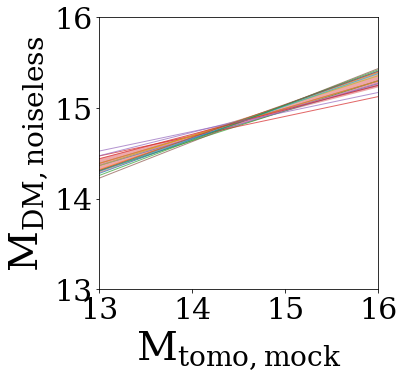

In [83]:
ntrain, co = plot_different_fits(z=2.6, th=2.40, lc=1.90)
ntest = np.arange(1,21)[np.in1d(np.arange(1,21), ntrain, invert=True)]
test_fit(co, ntest,z=2.6, th=2.40, lc=1.90)

|z | # Watersheds | slope | intercept |
|--|--|--| --|
|2.3|  | 0.41+-0.10 | 14.59+-0.05|
|2.4|  | 0.39+-0.06 | 14.54+-0.04|
|2.6|  | 0.32+-0.05 | 14.67+-0.03|

Conclusion :

- $\delta_F$-$\rho_{DM}$ realtion evolves signifincantly along redshift. 
- Adopting the same relation, leads to underestimatiom of the $M_{tomo}$ for both z=2.3 and z=2.6. Therefore a larger offset is required (~ by a factor of 2 larger)
- It is weird that z=2.3 and z=2.6 behave the same.


### number of watersheds :

In [ ]:
def get_watersheds_counts():
    counts = np.zeros((3,20))
    for i in range(20):
        counts[0,i] = h5py.File('./thresh/n1/peaks_TNG_z2.3_n1_sigma4_th2.35_lc2.00.hdf5')['mtomo'][:].size
        counts[1,i] = h5py.File('./thresh/n1/peaks_TNG_z2.4_n1_sigma4_th2.35_lc2.00.hdf5')['mtomo'][:].size
        counts[2,i] = h5py.File('./thresh/n1/peaks_TNG_z2.6_n1_sigma4_th2.35_lc2.00.hdf5')['mtomo'][:].size